In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [2]:
# Машина М/М/4/1
lamb = 7.23 # интенсивность входящего потока заявок
mu = 4.9 # интенсивность обслуживания заявки
r = 4 # количество каналов
m = 1 # возможная длина очереди

In [3]:
def solve_system():
    s = 1
    s_t = 1
    koef = [0]*(r+m)
    for i in range(r+m):
        if (i < r) and (i != 0):
            koef[i] = i * mu/lamb
        elif i > r:
            koef[i] = r * mu/lamb
        else:
            koef[i] = mu/lamb
    for i in range(len(koef)):
        for j in range (i, len(koef)):
            s_t *= koef[j]
        s += s_t
        s_t = 1
    s = 1/s
    p=[0] * (len(koef) + 1)
    p[len(koef)] = s
    for i in range(len(koef)-1, -1, -1):
        p[i] = koef[i] * p[i+1]
    for i in range(len(p)):
        if i <= r:
            print("p" + str(i) + " = " + str(p[i]) + " - вероятность того, что машины в количестве " + str(i) + " работают")
        else:
            print("p" + str(i) + " = " + str(p[i]) + " - вероятность того, что машины в количестве " + str(r) + " работают и бревна в количестве " + str(i-r) + " ожидают в очереди")
    return p

In [4]:
p = solve_system()

p0 = 0.12173684382454471 - вероятность того, что машины в количестве 0 работают
p1 = 0.1796239552758078 - вероятность того, что машины в количестве 1 работают
p2 = 0.2650369789069572 - вероятность того, что машины в количестве 2 работают
p3 = 0.19553238341809187 - вероятность того, что машины в количестве 3 работают
p4 = 0.0961700089872656 - вероятность того, что машины в количестве 4 работают
p5 = 0.14189982958733272 - вероятность того, что машины в количестве 4 работают и бревна в количестве 1 ожидают в очереди


In [5]:
P=[0]*(r+1)
for i in range(r+1):
   if i < r:
       P[i] = p[i]
   elif i == r:
       P[i] = sum(k for k in p if p.index(k) >= r)

In [6]:
 # вероятность, что k машин заняты рубкой ( 0 <= k <= r )
for i in range(len(P)):
    print('p' + str(i) + " = ", P[i])

p0 =  0.12173684382454471
p1 =  0.1796239552758078
p2 =  0.2650369789069572
p3 =  0.19553238341809187
p4 =  0.23806983857459832


In [7]:
def math_w(P=[]):
   M = 0
   for i in range(len(P)):
       M += i * P[i]
   return M
M_X = math_w(P)
print("Среднее число работающих машин: " + str(M_X))

Среднее число работающих машин: 2.248574417642391


In [8]:
for i in range(r+1): #для i от 4+1=5
   if i > 0: #если i = 0 - не берем вероятность (того, что 0 машин работает)
       P[i] = p[r-i] #P[1]= p[5-1]=p[4] (p = 1/s)
   else:
       P[i] = sum(k for k in p if p.index(k) >= r) #если же равен 0 то P[0] = p(5)
M_Y = math_w(P)
print("Среднее число простаивающих машин равно: " + str(M_Y))

Среднее число простаивающих машин равно: 1.7514255823576084


In [9]:
P = [0]*(m+1)
for i in range(m+1):
   if i == 0:
       P[i] = sum(k for k in p if p.index(k) <=r)
   else:
       P[i] = p[i+r]
M_Z = math_w(P)
print("Среднее число бревен в очереди: " + str(M_Z))

Среднее число бревен в очереди: 0.14189982958733272


In [10]:
print("Коэффициент загрузки машин: " + str(M_X/r))
print("Коэффициент простоя машин: " + str(M_Y/r))

Коэффициент загрузки машин: 0.5621436044105977
Коэффициент простоя машин: 0.4378563955894021


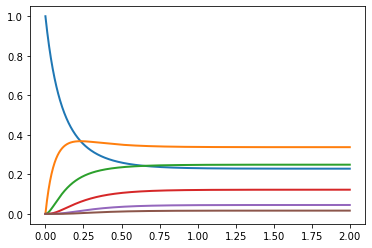

In [14]:
def f(y, t):
    y0, y1, y2, y3, y4, y5 = y[0], y[1], y[2], y[3], y[4], y[5]
    return [-lamb*y0+mu*y1, lamb*y0-(lamb+mu)*y1+2*mu*y2, lamb*y1-(2*mu + lamb)*y2+3*mu*y3, lamb*y2-(3*mu+lamb)*y3 + 4*mu*y4, lamb*y3-(4*mu+lamb)*y4 + 4*mu*y5, lamb*y4 - 4*mu*y5]
t = np.linspace(0, 2, 1000)
y0 = [1, 0, 0, 0, 0, 0]
w = odeint(f, y0, t)
y1, y2, y3, y4, y5, y6 = [], [], [], [], [], []

for i in range (len(w)):
   y1.append(w[i][0])
   y2.append(w[i][1])
   y3.append(w[i][2])
   y4.append(w[i][3])
   y5.append(w[i][4])
   y6.append(w[i][5])


plt.plot(t, y1, t, y2, t, y3, t, y4, t, y5, t, y6, linewidth=2)
plt.show()

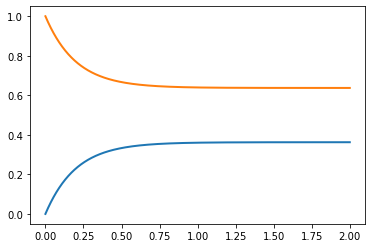

In [15]:
k_z = np.zeros(len(t))
k_p = np.zeros(len(t))

for i in range(len(t)):
   k_z[i] = (y2[i] + 2*y3[i] + 3*y4[i] + 4*(y5[i]+y6[i]))/r
   k_p[i] = (y4[i] + 2*y3[i] + 3*y2[i] + 4*y1[i])/r

plt.plot(t, k_z, t, k_p, linewidth=2)
plt.show()
